<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/Why_normalize_in_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 19th Sep, 2022
# My folder:
# Ref: https://stats.stackexchange.com/a/283941/78454
# Objectives:
#             a. What is normalization or feature scaling
#             b. What happens if data is not normalized before using KMeans
#                (Incorrect clusters are created)

### Call Libraries

In [1]:
# 1.0 Call libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# 1.1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### A simple experiment
Learning to work with numpy arrays

In [14]:
# 2.0  Create random data
#      Syntax: random.randn(d0, d1, ..., dn)
#      Returns a sample (or samples) from the “standard normal” distribution.
#      In a "standard normal distribution" mean is 0 and stddev is 1

rnorm = np.random.randn  # Rename numpy function object
rnorm(10)                # Get 10 points. 
                         # Values vary between -2 and +2 with 95% probability                

array([ 0.36561181, -1.26889551, -0.10610207,  0.91205654, -0.15808693,
        0.6618509 ,  0.89118224, -1.8757104 ,  0.78937561, -0.61471799])

In [41]:
# 2.1 Create 10 random points:

x = rnorm(10) * 10    # 10 times the usual values
x

array([  3.41164872, -12.69728288,   4.14399047,   6.32987418,
        14.23363731,  -1.25328194,   8.84897452,  -0.10296677,
        12.96659809,  -6.8262942 ])

In [36]:
# 2.2   We also create points along y-axis below
#        But check what np.concatenate() does when axis=0
#        Output is just one concatenated array

y = np.concatenate(
                    [
                      rnorm(5),       # An array of 5ts
                      rnorm(5) + 5    # IInd array of 5pts
                                        #   but center is 5 units above the earlier
                    ],
                   axis = 0             # Being one dimensional only one axis is available
                   )

# 2.2.1
y

array([-0.1399141 ,  0.82313119,  0.27599503,  0.16947866,  0.36729186,
        3.99882591,  2.51248546,  3.62009818,  5.71145496,  4.4872901 ])

#### Transpose
What is transpose? <br><br>
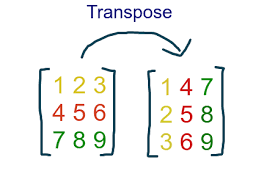

In [47]:
# 2.2.2 Transpose two side-by-side arrays: x,y

print("\n\n====Before transpose====\n")
z = np.array([x,y])    # Put x and y, one after another
z                      # Check also shape of z1

print("\n\n====After transpose====\n")

# (x,y) are paired, row-by-row
z1 = np.array([x,y]).T
z1   # Check also shape of z
     



====Before transpose====



array([[  3.41164872, -12.69728288,   4.14399047,   6.32987418,
         14.23363731,  -1.25328194,   8.84897452,  -0.10296677,
         12.96659809,  -6.8262942 ],
       [ -0.1399141 ,   0.82313119,   0.27599503,   0.16947866,
          0.36729186,   3.99882591,   2.51248546,   3.62009818,
          5.71145496,   4.4872901 ]])



====After transpose====



array([[  3.41164872,  -0.1399141 ],
       [-12.69728288,   0.82313119],
       [  4.14399047,   0.27599503],
       [  6.32987418,   0.16947866],
       [ 14.23363731,   0.36729186],
       [ -1.25328194,   3.99882591],
       [  8.84897452,   2.51248546],
       [ -0.10296677,   3.62009818],
       [ 12.96659809,   5.71145496],
       [ -6.8262942 ,   4.4872901 ]])

### Create data and plot it now

In [58]:
# 3.0
x = rnorm(1000) * 10            # Values along x-axis are 10 times higher
                                #  than that on y-axis (see below)
                                # Multiplication by 10 implies data is no longer normalized
                                #  While mean remains as 0, stddev increases to 10.
#x

In [59]:
# 3.1 Also now get corresponding 1000, y values (random)
y = np.concatenate(
                    [
                      rnorm(500),       # An array of 500pts
                      rnorm(500) + 5    # IInd array of 500pts
                                        #   but center is 5 units above the earlier
                    ],
                   axis = 0             # Being one dimensional only one axis is available
                   )

y.shape

(1000,)

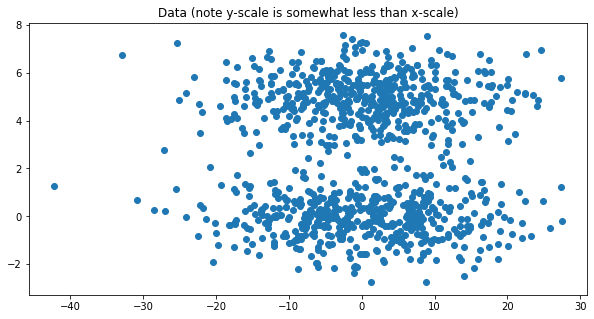

In [54]:
# 3.2 Plot the data:
fig, axes = plt.subplots(1, 1, figsize = (10,5))  
axes.scatter(x, y)  # Plot clusters
axes.set_title('Data (note y-scale is somewhat less than x-scale)')
plt.show() ;

### Perform kmeans
And plot clusters

In [55]:
# 4.0 Kmeans now
km = KMeans(2)  # We create 2 clusters
clusters = km.fit_predict(np.array([x, y]).T)   # Un-normalized data
clusters[:5]

array([0, 0, 0, 1, 0], dtype=int32)

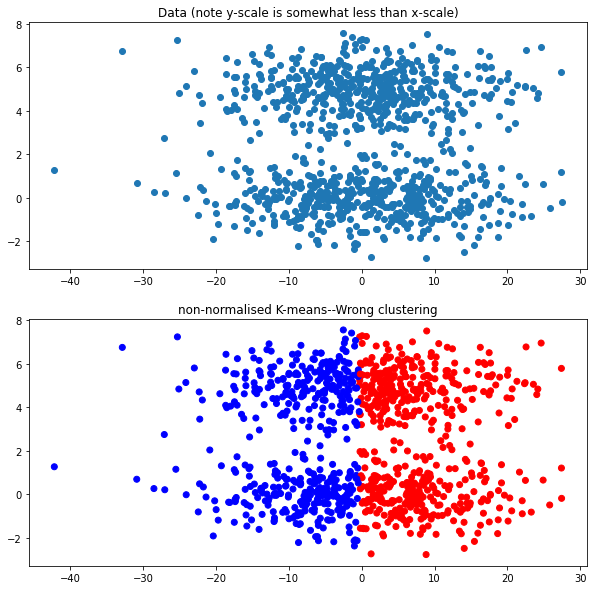

In [56]:
# 4.1 Make two plots 

# 4.1.1 One of data, as it is
fig, axes = plt.subplots(2, 1, figsize = (10,10))
axes[0].scatter(x, y)  # Plot clusters
axes[0].set_title('Data (note y-scale is somewhat less than x-scale)')


# 4.1.2 Next, of clustered data: No normalization
km = KMeans(2)  # We create 2 clusters
clusters = km.fit_predict(np.array([x, y]).T)   # Un-normalized data
axes[1].scatter(x, y, c=clusters, cmap='bwr')   # 'bwr' ==> blue, white, red
axes[1].set_title('non-normalised K-means--Wrong clustering')


# 4.1.3 Show all plots
plt.show();
############################

### Normalization


#### What is normalization?
Refer [here](https://en.wikipedia.org/wiki/Feature_scaling)

Data (or any column) can be normalized by any of the following three ways. Normalization, generally, gives good results in Machine Learning.<br>
Out of the following three (and there are other ways to normalize also), which one is best can only be decided by your final results. Generally The first one (also called Standard Scaling) is mostly used.

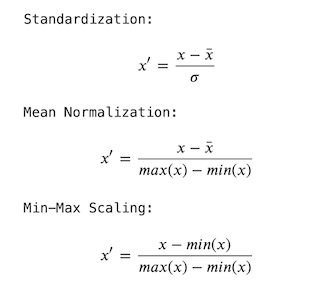

### Clustering with Standard Normalized data

In [ ]:
# Standard normalization
# 5.1 Formula for Standard Normalization is: (X - mean(X))/stddev(X)   
#       This is known as standard normalization
#       rnorm() values have mean = 0 and stddev = 1


t = rnorm(10)         # mean=0, stddev = 1
                      # t is already Standard normalized. 

print("\n---")

T = rnorm(10) * 10    # mean =0, stddev = 10 
                      # To Standard Normalize, divide by 10

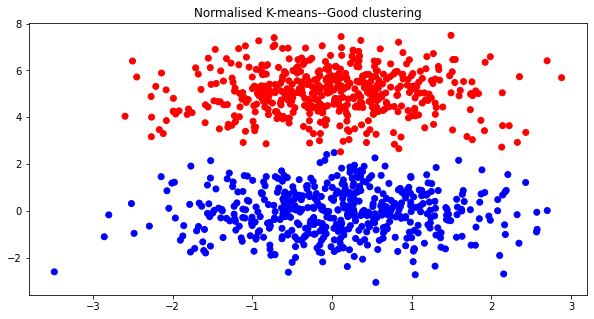

In [64]:
# 5.2 Standard Normalize data and cluster it
fig,ax = plt.subplots(1,1,figsize = (10,5))
clusters = km.fit_predict(np.array([x / 10, y]).T) # Normalized data
ax.scatter(x/10, y, c=clusters, cmap='bwr')
ax.set_title('Normalised K-means--Good clustering')


# 5.3 Now show plot
plt.show();
############################

In [ ]:
############## I am done ################